# Graded Challenge 3

- Nama  : Pramudya Adi Nugraha
- Batch : 10

## Description

### Objective

Graded Challenge 3 ini dibuat guna mengevaluasi kPractical Statistics sebagai berikut:

- Mampu memuat data dengan Pandas
- Mampu menangani missing values pada dataset
- Mampu melakukan manipulasi kolom
- Mampu membuat query terhadap dataset
- Mampu melakukan grouping terhadap dataset
- Mampu melakukan visualisasi sederhana menggunakan Pandas

### Problem Statement

Cari tahu measure of tendency, measure of variance, dan lakukan Hyphotesis testing dari dataset yang sudah diberikan

## Working Area

### Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

### Data Loading

In [2]:
data = pd.read_csv('ks-projects-201801.csv')
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Explorasi Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
data['usd_goal_real'].value_counts()

5000.00     24173
10000.00    20786
1000.00     13029
3000.00     12699
2000.00     11915
            ...  
2812.37         1
5511.57         1
34837.14        1
21.56           1
25566.05        1
Name: usd_goal_real, Length: 50339, dtype: int64

In [6]:
data['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [7]:
data2 = data.query("main_category == 'Art'")[['name', 'main_category', 'usd_goal_real']]
data2

,name,main_category,usd_goal_real
33,BB130A,Art,25000.0
38,Galaxy: Winnie and Friends,Art,3000.0
49,(In)visible Empire Tees,Art,1200.0
52,SkateFrames-Photo frame made from recycled ska...,Art,7500.0
62,TO RUSSIA WITH LOVE AND SIMON,Art,5000.0
...,...,...,...
378570,Fathers of cosplay,Art,20000.0
378574,Art Culture and development. building an art/m...,Art,20000.0
378612,31•13: Thesis Exhibition,Art,8000.0
378630,PookieCat rune cards - funny oracle cards for ...,Art,1695.6


### Measure of Central Tendency

In [8]:
data_mean =  data2['usd_goal_real'].mean()
data_median = data2['usd_goal_real'].median()
data_modus = data2['usd_goal_real'].mode()

print('Nilai mean :', data_mean)
print('Nilai median :', data_median)
print('Nilai modus :', data_modus[0])

Nilai mean : 39198.57587894709
Nilai median : 3000.0
Nilai modus : 5000.0


In [9]:
def print_skewness(data2):
    print(f'\'{data2.name}\' skewness: {data2.skew()}')
    print(f'\'{data2.name}\' kurtosis: {data2.kurt()}')
    if data2.skew() > 0.5:
        print('right skewed')
    elif data2.skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

In [10]:
#fungsi untuk visualisasi
def visualize_data(data2):
    print_skewness(data2) #panggil fungsi print_skewness
    
    plt.hist(data2, bins=20, rwidth=0.9, density=True) #histogram
    plt.xlabel(f'{data2.name}')
    plt.ylabel('Count')
    
    rng= np.arange(data2.min(), data2.max(), 10000)
    plt.plot(rng, norm.pdf(rng, data2.mean(), data2.std())) #pdf normal
    plt.legend(['Normal Distribution (PDF)', 'Histogram'])
    plt.axvline(data2.mean(), color='magenta', linestyle='dashed', linewidth=2) #mean
    plt.axvline(data2.median(), color='green', linestyle='dashed', linewidth=2) #median
    plt.axvline(data2.mode()[0], color='red', linestyle='dashed', linewidth=2) #mode

    plt.show()

'usd_goal_real' skewness: 61.03128941575268
'usd_goal_real' kurtosis: 4035.983898831817
right skewed


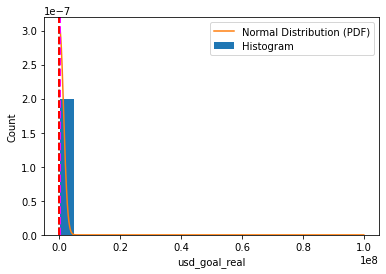

In [11]:
visualize_data(data2['usd_goal_real'])

### Measure of Variance*

In [17]:
data_range = data2['usd_goal_real'].max() - data2['usd_goal_real'].min()
data_var = data2['usd_goal_real'].var()
data_std = data2['usd_goal_real'].std()
data_quantile = data2['usd_goal_real'].quantile([0.25, 0.5, 0.75])

print('Nilai range :', data_range)
print('Nilai variance :', data_var)
print('Nilai Standard deviation :', data_std)
print('Nilai quantile : ', data_quantile)

Nilai range : 99999999.99
Nilai variance : 1720720075991.3699
Nilai Standard deviation : 1311762.2025319107
Nilai quantile :  0.25    1000.0
0.50    3000.0
0.75    7500.0
Name: usd_goal_real, dtype: float64


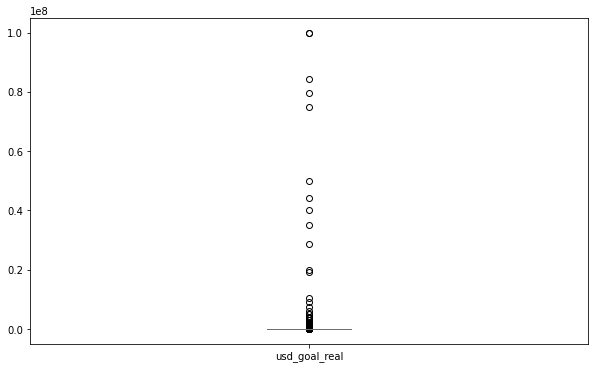

In [18]:
data2['usd_goal_real'].plot(kind='box', figsize=(10, 6))
plt.show()

In [19]:
Q1= data2.usd_goal_real.quantile(0.25)
Q3= data2.usd_goal_real.quantile(0.75)

IQR= Q3-Q1

lower_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
lower_limit, upper_limit

(-8750.0, 17250.0)

In [20]:
outlier_iqr= data2[(data2.usd_goal_real > upper_limit) | (data2.usd_goal_real < lower_limit)]
outlier_iqr

,name,main_category,usd_goal_real
33,BB130A,Art,25000.00
284,A Portrait a Day 365 Challenge,Art,30000.00
327,Dream Project,Art,233081.22
461,Mongol Art World Tour _ Save The Art,Art,25000.00
540,Painting an entire favela in Rio de Janeiro,Art,100000.00
...,...,...,...
378398,Wild Times,Art,20000.00
378468,Teaching Millenials how to drive Manual cars!,Art,35000.00
378499,"100 Drawings/John Raimondi, Sculptor (Canceled)",Art,45000.00
378570,Fathers of cosplay,Art,20000.00


In [21]:
data_new = data2[~(data2.usd_goal_real > upper_limit) & ~(data2.usd_goal_real < lower_limit)]
data_new

,name,main_category,usd_goal_real
38,Galaxy: Winnie and Friends,Art,3000.00
49,(In)visible Empire Tees,Art,1200.00
52,SkateFrames-Photo frame made from recycled ska...,Art,7500.00
62,TO RUSSIA WITH LOVE AND SIMON,Art,5000.00
116,Carriage,Art,8000.00
...,...,...,...
378557,Blade of Marmora (Voltron: Legendary Defender)...,Art,381.71
378560,HYBRID a Local Art Productions group Art Show,Art,4300.00
378612,31•13: Thesis Exhibition,Art,8000.00
378630,PookieCat rune cards - funny oracle cards for ...,Art,1695.60


### Hyphotesis Testing*

Our hypothesis on this case:

**H0: μ data awal = μ data tanpa outlier**

**H1: μ data awal != μ data tanpa outlier**

In [22]:
data_new['usd_goal_real'].mean()

3617.46787708825

In [23]:
data_mean

39198.57587894709

In [25]:
t_stat,p_val = stats.ttest_1samp(data_new.usd_goal_real, data_mean)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: -1497.786178635619


## Conclusions, Assumptions, Overall Analysis

- Data yang digunakan merupakan pengambilan sample usd_goal_real dari projek dengan main kategori Art
- Dari hasil perhitungan central tendency diketahui nilai mean : 39198.57587894709, median : 3000.0, dan modus : 5000.0
- Diperoleh nilai skewness sebesar 61.03128941575268, karena ilai skewness lebih dari 0.5, maka data tergolong right-skewed
- Dari hasil perhitungan variance, diperoleh nilai range : 99999999.99, variance : 1720720075991.3699, Standard deviation : 1311762.2025319107
- Diperoleh nilai quantile 0.25 : 1000.0, 0.5 : 3000.0, dan 0.75 : 7500.0
- Karena data tidak terdistribusi secara normal, maka dilakukan pencarian outlier dan diperoleh outlier sebanyak : 3192
- Kemudian outlier tersebut dilakukan cleaning, lalu dilakukan hyphotesis testing dengan menggunakan metode 1 sample test, untuk mengetahui apakah nilai rata-rata dari data usd_goal_real awal sebelum dilakukan cleaning sama dengan rata-rata dari data usd_goal_real setelah dilakukan cleaning
- Didapatkan nilai P-value : 0.0, karena nilai P-value lebih kecil dari 0.05 atau 5%, maka H0 gagal ditolak, sehingga ada kemungkinan rata-rata dari data usd_goal_real awal sebelum dilakukan cleaning tidak sama dengan rata-rata dari data usd_goal_real setelah dilakukan cleaning